In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 학습 모델 저장을 위한 라이브러리
import pickle

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 생략 없이 모든 값 출력 설정
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# 1. 데이터 불러오기
df = pd.read_parquet("open/train/청구정보_with_segment.parquet")

# 2. 범주형 컬럼을 수치형으로 변환
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# 3. Segment도 숫자로 인코딩
df["Segment_code"] = df["Segment"]

# 4. 전체 수치형 컬럼 간 상관계수 계산 (범주형 변환 포함)
corr_with_segment = df.corr(numeric_only=True)["Segment_code"].drop("Segment_code").sort_values(ascending=False)

# 5. 결과 출력
print("📊 Segment와의 상관계수 (내림차순 정렬):")
print(corr_with_segment)


📊 Segment와의 상관계수 (내림차순 정렬):
Segment             1.000000e+00
할인건수_B0M            9.197313e-02
대표청구지고객주소구분코드       6.818304e-02
할인건수_R3M            5.931681e-02
대표결제일               3.646445e-03
포인트_잔여포인트_B0M       2.584055e-03
ID                  1.218077e-03
기준년월                9.208416e-14
대표청구서수령지구분코드       -1.805543e-02
청구서수령방법            -2.596360e-02
연체건수_R3M           -5.481393e-02
연체건수_R6M           -6.050367e-02
포인트_포인트_월적립_B0M    -1.156051e-01
포인트_포인트_월적립_R3M    -1.256698e-01
상환개월수_결제일_R3M      -1.334154e-01
포인트_이용포인트_R12M     -1.432407e-01
포인트_포인트_건별_B0M     -1.445468e-01
포인트_포인트_건별_R3M     -1.467265e-01
선결제건수_R3M          -1.473906e-01
상환개월수_결제일_R6M      -1.490485e-01
청구서발송여부_R6M        -1.536969e-01
선결제건수_R6M          -1.588749e-01
포인트_이용포인트_R3M      -1.701519e-01
포인트_적립포인트_R3M      -1.732861e-01
포인트_적립포인트_R12M     -1.753621e-01
포인트_마일리지_월적립_B0M   -1.755938e-01
할인금액_B0M           -1.801815e-01
포인트_마일리지_월적립_R3M   -1.806338e-01
마일_잔여포인트_B0M       -1.835462e-01
할인금액_R3M       

In [3]:
print("전체 컬럼 수:", len(df.columns))
print("컬럼 목록:")
print(df.columns.tolist())


전체 컬럼 수: 48
컬럼 목록:
['기준년월', 'ID', '대표결제일', '대표결제방법코드', '대표청구지고객주소구분코드', '대표청구서수령지구분코드', '청구서수령방법', '청구서발송여부_B0', '청구서발송여부_R3M', '청구서발송여부_R6M', '청구금액_B0', '청구금액_R3M', '청구금액_R6M', '포인트_마일리지_건별_B0M', '포인트_마일리지_건별_R3M', '포인트_포인트_건별_B0M', '포인트_포인트_건별_R3M', '포인트_마일리지_월적립_B0M', '포인트_마일리지_월적립_R3M', '포인트_포인트_월적립_B0M', '포인트_포인트_월적립_R3M', '포인트_적립포인트_R12M', '포인트_적립포인트_R3M', '포인트_이용포인트_R12M', '포인트_이용포인트_R3M', '포인트_잔여포인트_B0M', '마일_적립포인트_R12M', '마일_적립포인트_R3M', '마일_이용포인트_R12M', '마일_이용포인트_R3M', '마일_잔여포인트_B0M', '할인건수_R3M', '할인금액_R3M', '할인건수_B0M', '할인금액_B0M', '할인금액_청구서_R3M', '할인금액_청구서_B0M', '상환개월수_결제일_R6M', '상환개월수_결제일_R3M', '선결제건수_R6M', '선결제건수_R3M', '연체건수_R6M', '연체건수_R3M', '혜택수혜금액_R3M', '포인트_마일리지_환산_B0M', '혜택수혜금액', 'Segment', 'Segment_code']


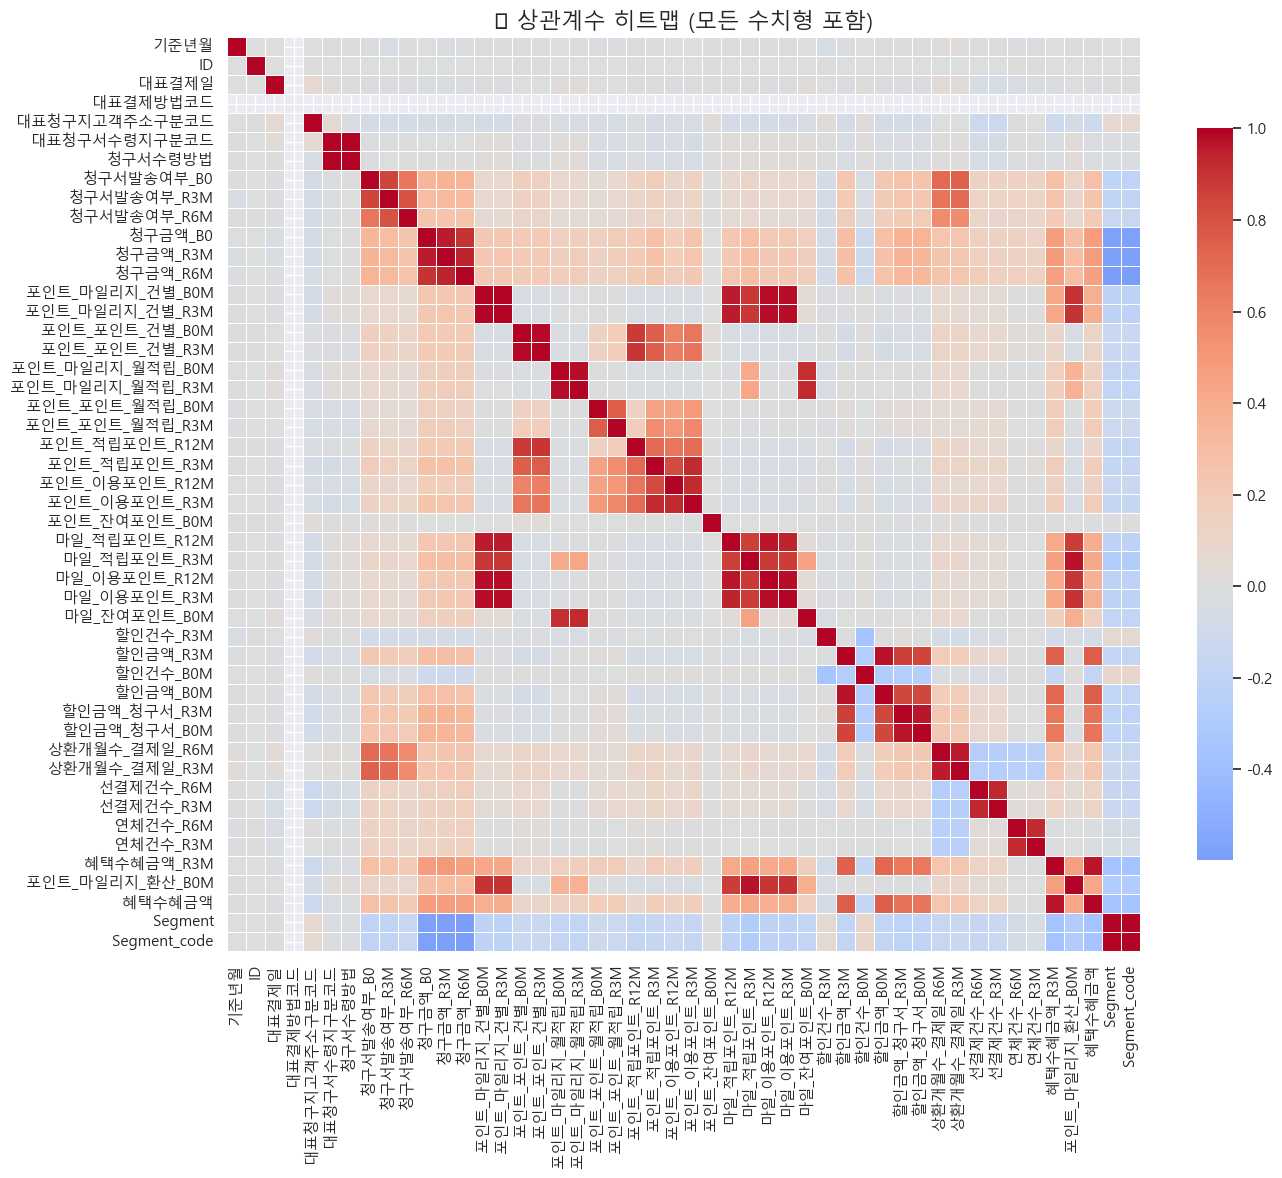

In [4]:
corr_matrix = df.corr(numeric_only=True)

# 5. 히트맵 시각화
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    annot=False,        # 숫자 생략 (많은 경우에는 복잡)
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)
plt.title("📊 상관계수 히트맵 (모든 수치형 포함)", fontsize=16)
plt.tight_layout()
plt.show()

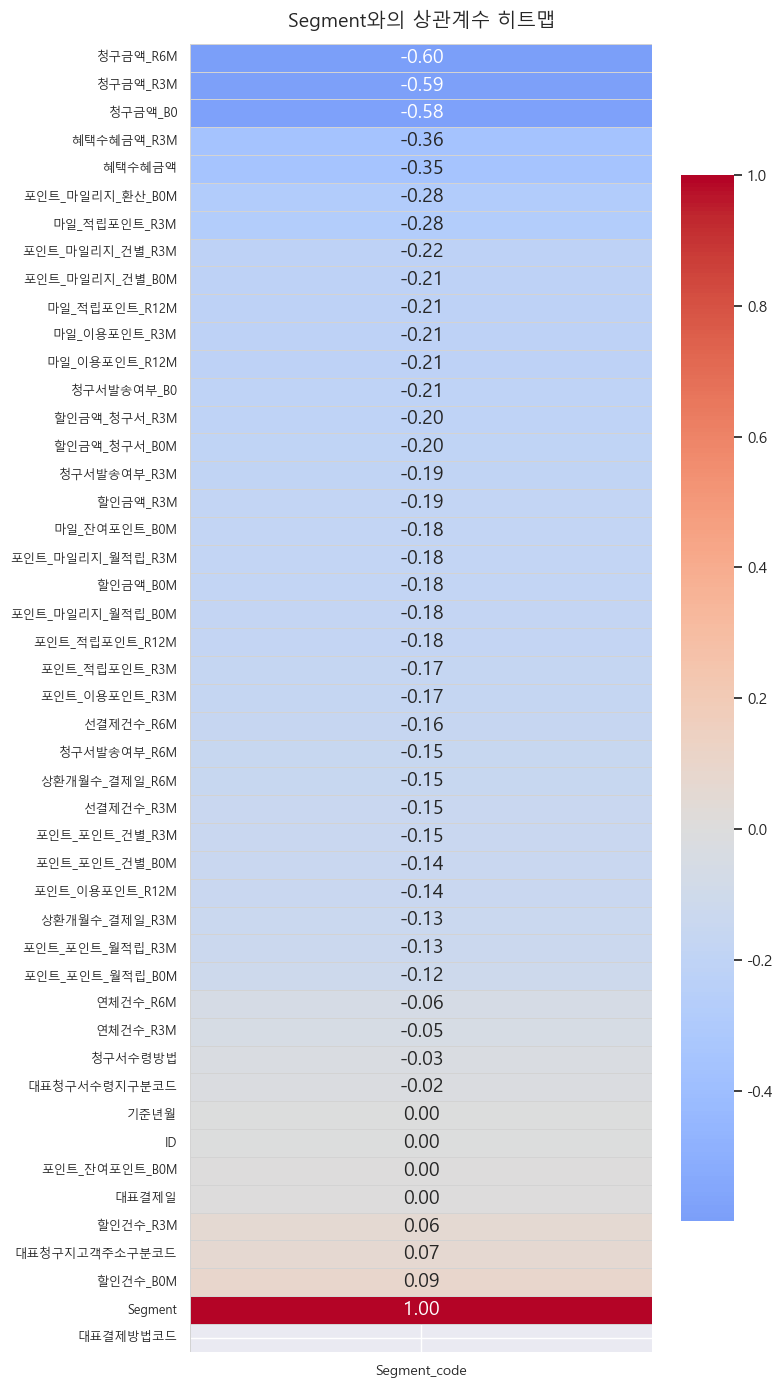

In [5]:
# 범주형 → 수치형으로 변환
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Segment 인코딩
df["Segment_code"] = df["Segment"]

# 상관계수 계산
corr = df.corr(numeric_only=True)

# Segment_code와 다른 컬럼의 상관계수만 추출
segment_corr = corr["Segment_code"].drop("Segment_code").sort_values()

# 히트맵 시각화
plt.figure(figsize=(8, len(segment_corr) * 0.3))  # 길이에 따라 자동조절
sns.heatmap(
    segment_corr.to_frame(), 
    annot=True, fmt=".2f", cmap="coolwarm", center=0, 
    cbar_kws={"shrink": 0.8}, linewidths=0.5, linecolor='lightgray'
)

plt.title("Segment와의 상관계수 히트맵", fontsize=14, pad=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=9, rotation=0)
plt.tight_layout()
plt.show()

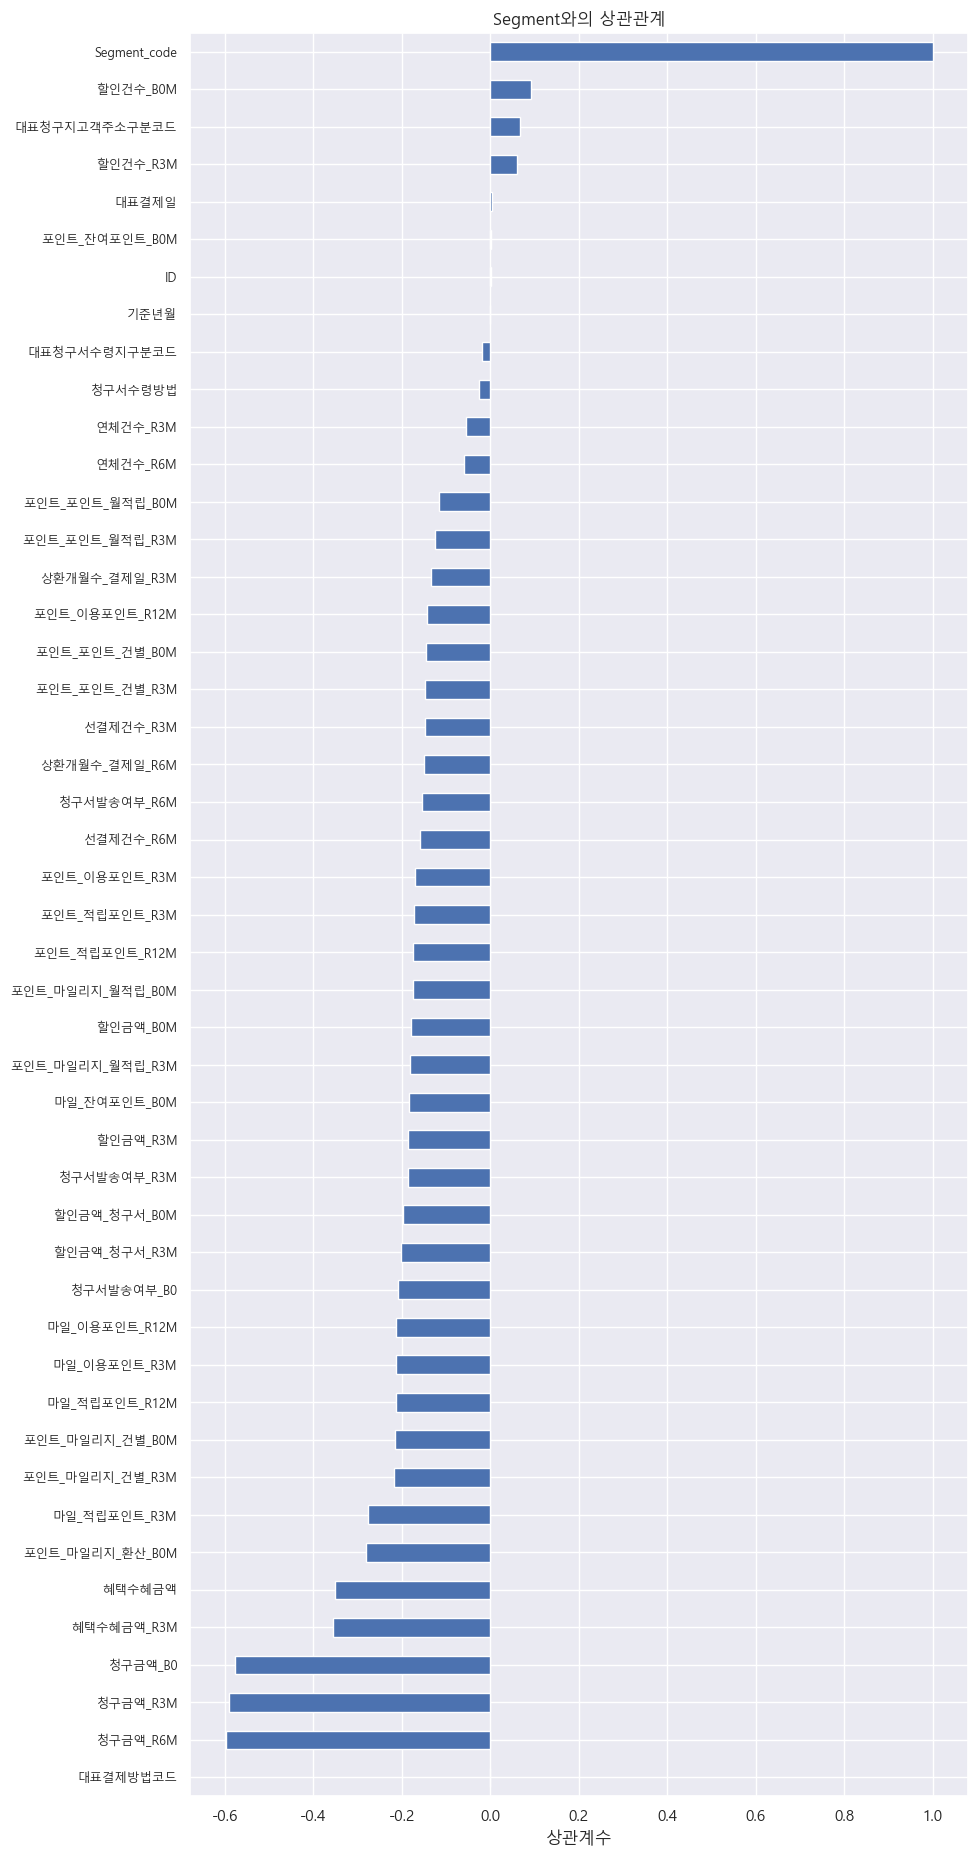

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


# 범주형 수치로 변환
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# 상관계수 계산
corr = df.corr(numeric_only=True)

# Segment와의 상관관계만 추출
segment_corr = corr['Segment'].drop('Segment').sort_values(ascending=False)

# 시각화 (막대그래프)
plt.figure(figsize=(10, len(segment_corr) * 0.4))
segment_corr.plot(kind='barh')
plt.title("Segment와의 상관관계")
plt.xlabel("상관계수")
plt.yticks(fontsize=9)  # y축 텍스트 크기 조정
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


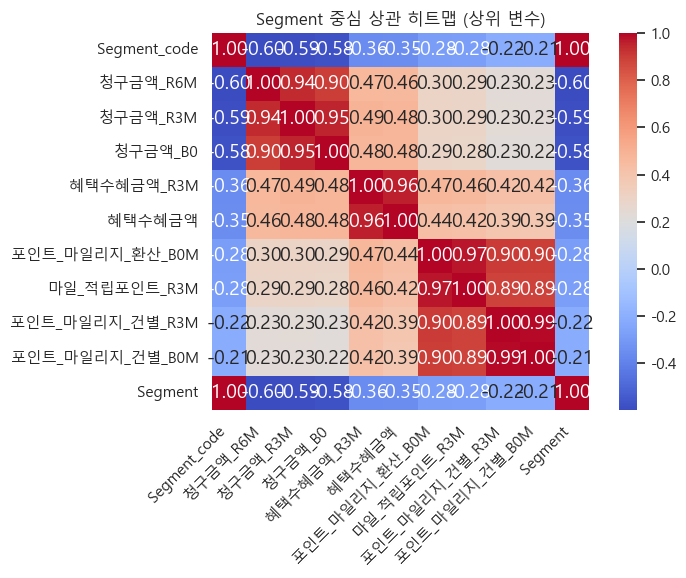

In [7]:
top_features = corr['Segment'].abs().sort_values(ascending=False).drop('Segment').head(10).index.tolist()
selected_corr = corr.loc[top_features + ['Segment'], top_features + ['Segment']]

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(selected_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Segment 중심 상관 히트맵 (상위 변수)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# 결측치 제거

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. 데이터 불러오기
df = pd.read_parquet("open/train/청구정보_with_segment.parquet")

# 생략 없이 모든 값 출력 설정
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# 2. 범주형 → 수치형으로 변환
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# 3. Segment를 수치형으로 변환 (혹시 문자일 수도 있으므로)
if df["Segment"].dtype == 'object' or df["Segment"].dtype.name == 'category':
    df["Segment"] = LabelEncoder().fit_transform(df["Segment"].astype(str))

# 4. 수치형 컬럼 리스트 (Segment 제외)
numeric_cols = df.select_dtypes(include="number").columns.drop("Segment")

# 5. 각 컬럼에서 해당 컬럼의 결측치만 제거하고 Segment와 상관계수 계산
corr_dict = {}
for col in numeric_cols:
    valid_idx = df[col].notna()
    if valid_idx.sum() >= 2:
        corr_val = df.loc[valid_idx, col].corr(df.loc[valid_idx, "Segment"])
        corr_dict[col] = corr_val

# 6. 결과 정리
segment_corr1 = pd.Series(corr_dict).sort_values(ascending=False)

# 7. 출력
print("📊 Segment와의 상관계수 (각 변수 결측치 제거 기준):")
print(segment_corr1)


📊 Segment와의 상관계수 (각 변수 결측치 제거 기준):
할인건수_B0M            9.197313e-02
대표청구지고객주소구분코드       6.818304e-02
할인건수_R3M            5.931681e-02
대표결제일               3.646445e-03
포인트_잔여포인트_B0M       2.584055e-03
ID                  1.218077e-03
기준년월                8.217349e-19
대표청구서수령지구분코드       -1.805543e-02
청구서수령방법            -2.596360e-02
연체건수_R3M           -5.481393e-02
연체건수_R6M           -6.050367e-02
포인트_포인트_월적립_B0M    -1.156051e-01
포인트_포인트_월적립_R3M    -1.256698e-01
상환개월수_결제일_R3M      -1.334154e-01
포인트_이용포인트_R12M     -1.432407e-01
포인트_포인트_건별_B0M     -1.445468e-01
포인트_포인트_건별_R3M     -1.467265e-01
선결제건수_R3M          -1.473906e-01
상환개월수_결제일_R6M      -1.490485e-01
청구서발송여부_R6M        -1.536969e-01
선결제건수_R6M          -1.588749e-01
포인트_이용포인트_R3M      -1.701519e-01
포인트_적립포인트_R3M      -1.732861e-01
포인트_적립포인트_R12M     -1.753621e-01
포인트_마일리지_월적립_B0M   -1.755938e-01
할인금액_B0M           -1.801815e-01
포인트_마일리지_월적립_R3M   -1.806338e-01
마일_잔여포인트_B0M       -1.835462e-01
할인금액_R3M           -1.856518e-01
청구서발송여부_

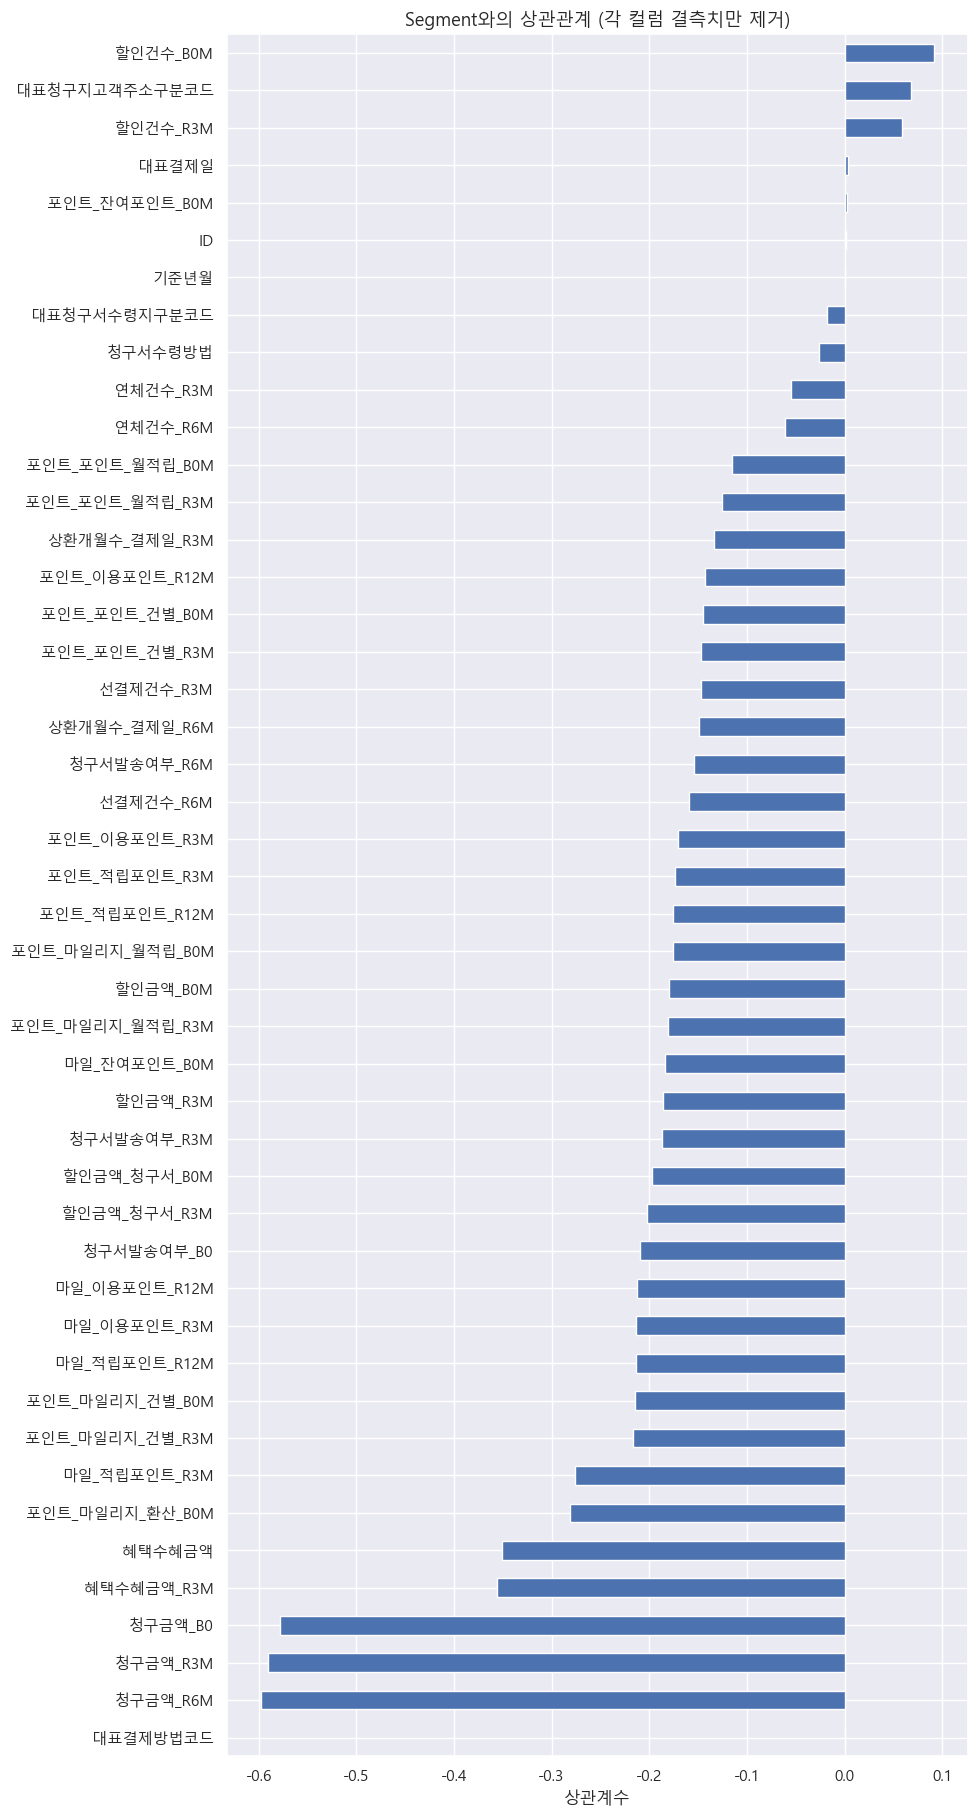

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, len(segment_corr1) * 0.4))
segment_corr1.plot(kind='barh')
plt.title("Segment와의 상관관계 (각 컬럼 결측치만 제거)", fontsize=13)
plt.xlabel("상관계수")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


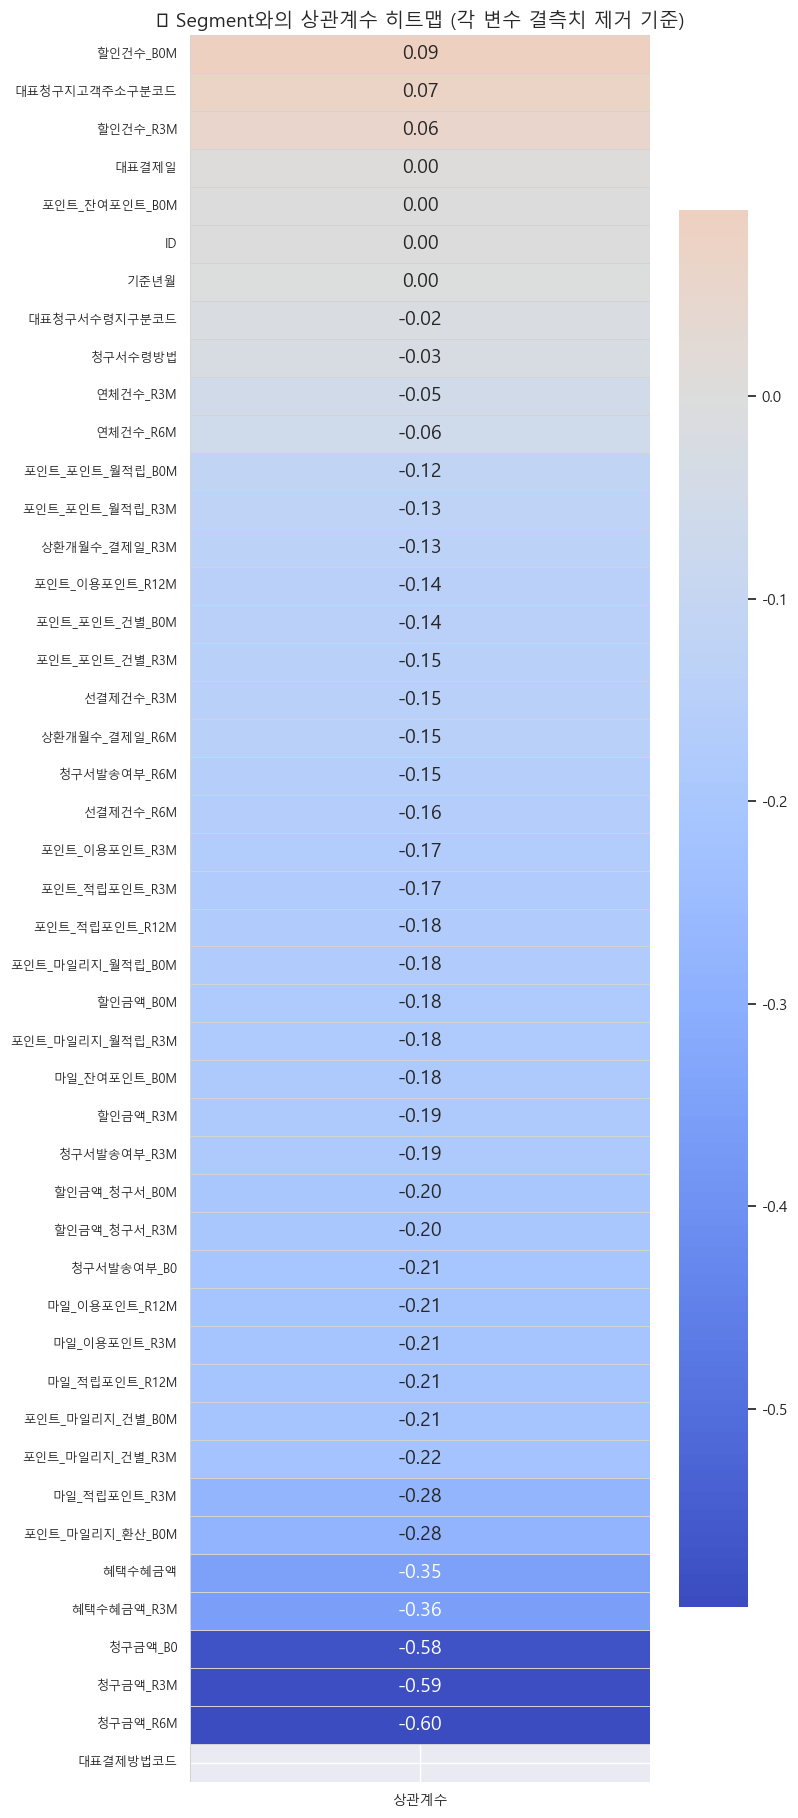

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히트맵 시각화
plt.figure(figsize=(8, len(segment_corr1) * 0.4))
sns.heatmap(
    segment_corr1.to_frame(name="상관계수"),
    annot=True, fmt=".2f", cmap="coolwarm", center=0,
    linewidths=0.5, linecolor="lightgray",
    cbar_kws={"shrink": 0.8}
)

plt.title("📊 Segment와의 상관계수 히트맵 (각 변수 결측치 제거 기준)", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=9, rotation=0)
plt.tight_layout()
plt.show()


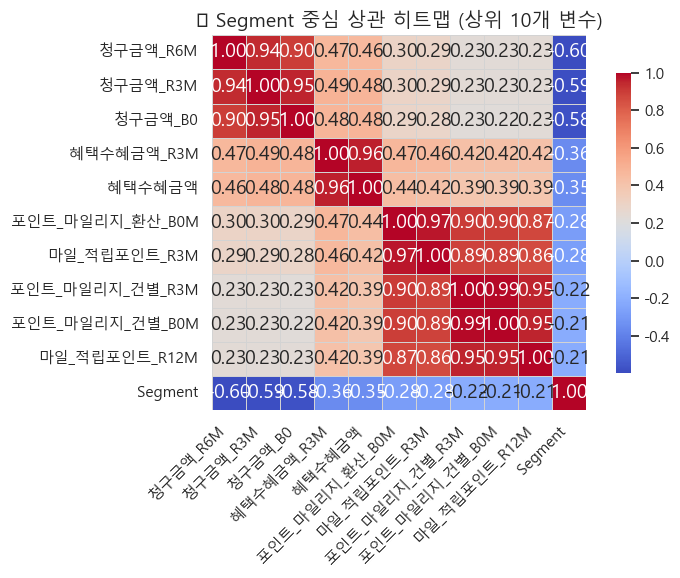

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. 데이터 불러오기
df = pd.read_parquet("open/train/청구정보_with_segment.parquet")

# 2. 범주형 → 수치형으로 변환
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# 3. Segment 인코딩
df["Segment"] = LabelEncoder().fit_transform(df["Segment"].astype(str))

# 4. 수치형 컬럼만 추출
numeric_cols = df.select_dtypes(include="number").columns.tolist()

# 5. 상관계수 행렬 초기화
corr_matrix = pd.DataFrame(index=numeric_cols, columns=numeric_cols, dtype=float)

# 6. 각 변수쌍마다 결측치 제거 후 상관계수 계산
for col1 in numeric_cols:
    for col2 in numeric_cols:
        if col1 == col2:
            corr_matrix.loc[col1, col2] = 1.0  # 자기 자신과는 상관계수 1
        else:
            temp = df[[col1, col2]].dropna()
            if len(temp) >= 2:
                corr_val = temp[col1].corr(temp[col2])
                corr_matrix.loc[col1, col2] = corr_val

# 7. Segment 기준 상관 절댓값 상위 10개 변수 추출
top_features = corr_matrix["Segment"].abs().sort_values(ascending=False).drop("Segment").head(10).index.tolist()

# 8. Segment 포함 상관행렬 추출
selected_corr = corr_matrix.loc[top_features + ["Segment"], top_features + ["Segment"]]

# 9. 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(
    selected_corr.astype(float),
    annot=True, fmt=".2f", cmap="coolwarm", square=True,
    linewidths=0.5, linecolor="lightgray", cbar_kws={"shrink": 0.8}
)
plt.title("📊 Segment 중심 상관 히트맵 (상위 10개 변수)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [14]:
# 예: corr_with_segment 라는 Series가 있다고 가정
# NaN 제외하고 절댓값 기준으로 중앙값 계산

median_corr = segment_corr1.dropna().abs().median()

print("Segment와의 상관계수 중앙값:", median_corr)


Segment와의 상관계수 중앙값: 0.17328612542168048


In [16]:
# 상관계수 Series가 corr_with_segment 라고 가정
# 절댓값이 0.3 이상인 컬럼만 추출
selected_features = segment_corr1[abs(segment_corr1) >= 0.3].index.tolist()

# Segment 컬럼도 포함해서 저장할 컬럼 리스트 만들기
cols_to_save = selected_features + ['Segment']

# 해당 컬럼들만 포함된 데이터프레임 만들기
filtered_df = df[cols_to_save]

# CSV로 저장
filtered_df.to_csv("04.청구정보_컬럼선택.csv", index=False, encoding="utf-8-sig")


In [1]:
import pandas as pd
from IPython.display import display

# 1. 합쳐진 파일 불러오기
df = pd.read_parquet("open/train/청구정보_with_segment.parquet")

# 2. Segment 컬럼 자동 탐색 및 숫자형 변환
segment_col_candidates = [col for col in df.columns if 'segment' in col.lower()]
print("사용 가능한 Segment 컬럼 후보:", segment_col_candidates)
segment_col = segment_col_candidates[-1]

if df[segment_col].dtype == 'object':
    df[segment_col] = df[segment_col].astype('category').cat.codes

# 3. 숫자형 컬럼만 추출 (Segment 제외)
numeric_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col != segment_col]

# 4. 결측치 제거 및 std=0 컬럼 제거
clean_df = df[numeric_cols + [segment_col]].dropna()
clean_df = clean_df.loc[:, clean_df.std() != 0]
numeric_cols = [col for col in numeric_cols if col in clean_df.columns]

# 5. 결측치 수 계산
missing_dict = {
    col: df[col].isnull().sum()
    for col in numeric_cols
}

# 6. 이상치 수 계산 (IQR 기준)
outlier_dict = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outlier_dict[col] = outliers

# 7. 상관계수 계산 (Segment 기준)
corr_dict = {
    col: clean_df[segment_col].corr(clean_df[col])
    for col in numeric_cols
}

# 8. 결과 정리
corr_df = pd.DataFrame({
    '컬럼명': list(corr_dict.keys()),
    '상관계수': list(corr_dict.values()),
    '결측치 수': [missing_dict[col] for col in corr_dict.keys()],
    '이상치 수': [outlier_dict[col] for col in corr_dict.keys()]
})

corr_df = corr_df.sort_values(by='상관계수', key=abs, ascending=False)

# 9. 시각화 출력
styled = corr_df.style.background_gradient(cmap='coolwarm', subset=['상관계수']) \
                    .set_properties(**{'text-align': 'center'}) \
                    .set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
display(styled)


사용 가능한 Segment 컬럼 후보: ['Segment']


,컬럼명,상관계수,결측치 수,이상치 수
7,청구금액_R6M,-0.597904,0,174712
6,청구금액_R3M,-0.590678,0,174064
5,청구금액_B0,-0.577988,0,176986
36,혜택수혜금액_R3M,-0.355754,0,322205
38,혜택수혜금액,-0.350857,0,283531
37,포인트_마일리지_환산_B0M,-0.281306,0,118993
22,마일_적립포인트_R3M,-0.276183,0,121213
9,포인트_마일리지_건별_R3M,-0.216643,0,67231
8,포인트_마일리지_건별_B0M,-0.214917,0,66385
21,마일_적립포인트_R12M,-0.213707,0,80880
